<a href="https://colab.research.google.com/github/projjal1/Neural_Networks_Projects/blob/master/NYSE_Stock_Prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working on Stock Price Prediction Dataset from NYSE.
Dataset taken from https://www.kaggle.com/dgawlik/nyse

In [ ]:
#Import modules
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#Unzip archive
!unzip archive.zip

Archive:  archive.zip
replace fundamentals.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace prices-split-adjusted.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace prices.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
#Read the dataset
dataset=pd.read_csv('prices-split-adjusted.csv',index_col = 0)

In [ ]:
#A look at the dataset with 4 rows
dataset.head(4)

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0


In [ ]:
#Which Stock to work with
interested_Stock='AAPL'

In [ ]:
#We are interested to look at AAPL stocks 
dataset=dataset[dataset.symbol==interested_Stock]
dataset.count()

symbol    1762
open      1762
close     1762
low       1762
high      1762
volume    1762
dtype: int64

In [ ]:
#Now let's drop symbol and volume columns
dataset.drop(['symbol','volume'],axis=1,inplace=True)
#Columns of dataset
dataset.columns

Index(['open', 'close', 'low', 'high'], dtype='object')

In [ ]:
#Splitting into train,test values
train=dataset.iloc[:1000].values
test=dataset.iloc[1000:].values
print(train.shape,test.shape)

(1000, 4) (762, 4)


In [ ]:
#Now let's normalize the features
scaler=sklearn.preprocessing.MinMaxScaler()
train_scaled=scaler.fit_transform(train)
test_scaled=scaler.fit_transform(test)

In [ ]:
#Looking at scaled training set values
train_scaled[:2]

array([[0.22035616, 0.24615579, 0.23315315, 0.22355939],
       [0.23981239, 0.239754  , 0.24490821, 0.22336832]])

In [ ]:
#We are going to look at seq_length history of records
seq_length=20

In [ ]:
#Creating history of data to feed into RNN model
trainX=[]
trainY=[]

for i in range(1000-seq_length):
  trainX.append(train_scaled[i:i+seq_length])
  #Taking target at close value of Stock
  trainY.append(train_scaled[i][1])

trainX=np.array(trainX)
trainY=np.array(trainY).reshape((1000-seq_length,1))

print("Shape of training data: ",trainX.shape)
print("Shape of test data:",trainY.shape)

Shape of training data:  (980, 20, 4)
Shape of test data: (980, 1)


In [ ]:
#Modules for building models 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(trainX, trainY, epochs=100, batch_size = 32)

Epoch 1/100
31/31 [==============================] - 6s 9ms/step - loss: 0.0904
Epoch 2/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 3/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0045
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 5/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 6/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0045
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 8/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 9/100
31/31 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 10/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 11/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 12/100
31/31 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 13/100
31/31 [=================

In [ ]:
#Let's create dataset for predictions
testX=[]
testY=[]
for i in range(len(test)-seq_length):
  testX.append(test_scaled[i:i+seq_length])
  testY.append(test_scaled[i][1])

testX=np.array(testX)
testY=np.array(testY).reshape((len(test)-seq_length,1))


print("Shape of test data:",testX.shape)
print("Shape of test labels:",testY.shape)

Shape of test data: (742, 20, 4)
Shape of test labels: (742, 1)


In [ ]:
#Predictions 
predicted_data=model.predict(testX)

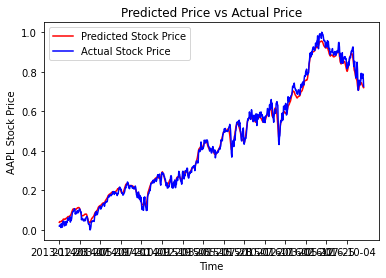

In [ ]:
#Plotting values
plt.plot(dataset.index.values[1000:1000+len(test)-seq_length],predicted_data,color='red'
,label="Predicted Stock Price")
plt.plot(dataset.index.values[1000:1000+len(test)-seq_length],testY,color='blue',
         label="Actual Stock Price")
plt.xticks(np.arange(0,len(test)-seq_length,50))
plt.title("Predicted Price vs Actual Price")
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()